# 🚢 Phase 1: Titanic Data Exploration (EDA)

## Objectives
- Load and understand the Titanic dataset structure
- Identify data types, missing values, and distributions
- Analyze survival patterns across different features
- Detect outliers and anomalies
- Generate insights to guide data cleaning and feature engineering

## What You'll Learn
✅ Initial data inspection techniques  
✅ Missing value analysis  
✅ Feature distribution visualization  
✅ Correlation analysis  
✅ Survival rate patterns  
✅ Outlier detection methods



## 1. Setup and Configuration
Import necessary libraries for data analysis and visualization

In [19]:
# Import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Configure display and plotting settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Set figure size defaults
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Libraries imported successfully!")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")

✅ Libraries imported successfully!
NumPy version: 2.4.1
Pandas version: 2.3.3


## 2. Load Dataset

🎯 **Task:** Load the Titanic training dataset from the data folder.

**Note:** Make sure you've downloaded `train.csv` to the `../data/` folder (see download_instructions.txt)

In [20]:
# Load the dataset
df = pd.read_csv('../data/train.csv')

print("✅ Dataset loaded successfully!")
print(f"Dataset shape: {df.shape[0]} rows × {df.shape[1]} columns")

✅ Dataset loaded successfully!
Dataset shape: 891 rows × 12 columns


## 3. Initial Data Inspection

Understanding the structure and basic properties of the dataset

In [3]:
# Display first 5 rows
print("📊 First 5 rows of the dataset:")
print("="*80)
df.head()

📊 First 5 rows of the dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Dataset information
print("📋 Dataset Information:")
print("="*80)
df.info()

📋 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Statistical summary
print("📈 Statistical Summary:")
print("="*80)
df.describe()

📈 Statistical Summary:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# 🎯 TASK: Understand each column
print("🔍 Column Descriptions:")
print("="*80)
print("""
PassengerId: Unique identifier for each passenger
Survived: Survival status (0 = No, 1 = Yes) → TARGET VARIABLE
Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd) → Proxy for socio-economic status
Name: Passenger name
Sex: Gender
Age: Age in years
SibSp: Number of siblings/spouses aboard
Parch: Number of parents/children aboard
Ticket: Ticket number
Fare: Passenger fare
Cabin: Cabin number
Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
""")

print(f"\nColumn names: {df.columns.tolist()}")

🔍 Column Descriptions:

PassengerId: Unique identifier for each passenger
Survived: Survival status (0 = No, 1 = Yes) → TARGET VARIABLE
Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd) → Proxy for socio-economic status
Name: Passenger name
Sex: Gender
Age: Age in years
SibSp: Number of siblings/spouses aboard
Parch: Number of parents/children aboard
Ticket: Ticket number
Fare: Passenger fare
Cabin: Cabin number
Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)


Column names: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


## 4. Missing Values Analysis

Identifying and visualizing missing data patterns

In [23]:
# Calculate missing values
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})
missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

print("Missing Values Summary:")

print(missing_data.to_string(index=False))
print(f"\nTotal missing values: {df.isnull().sum().sum()}")

Missing Values Summary:
  Column  Missing_Count  Missing_Percentage
   Cabin            687               77.10
     Age            177               19.87
Embarked              2                0.22

Total missing values: 866


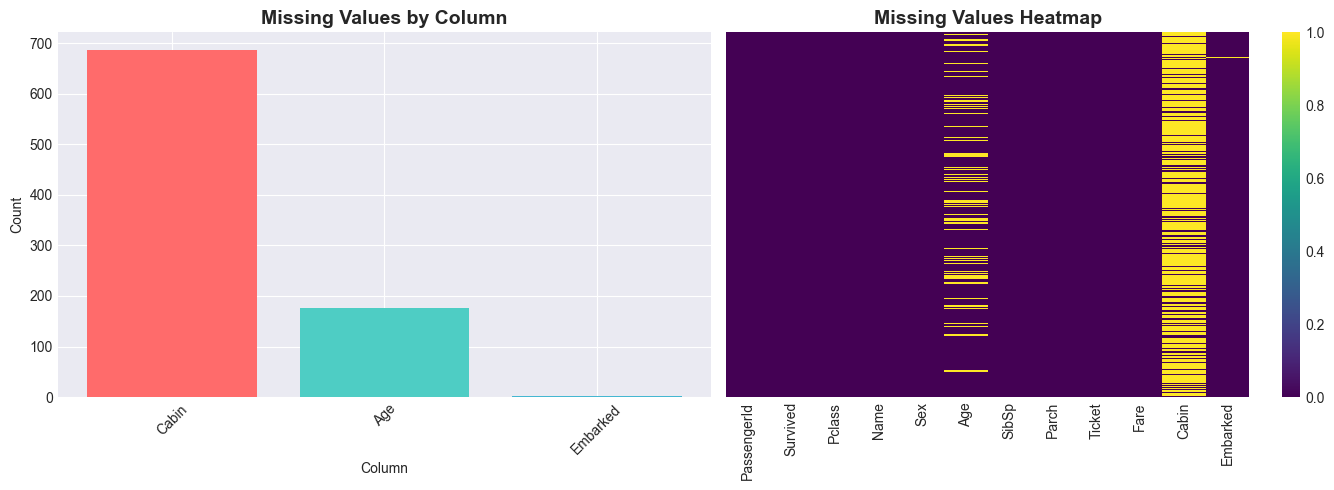

💡 Key Observations:
- Cabin has 77% missing → May need to drop or extract limited info
- Age has 20% missing → Will need imputation strategy
- Embarked has 2 missing → Can fill with mode


In [8]:
# Visualize missing values
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot of missing values
missing_cols = df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
axes[0].bar(missing_cols.index, missing_cols.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[0].set_title('Missing Values by Column', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Column')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Heatmap of missing values
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis', ax=axes[1])
axes[1].set_title('Missing Values Heatmap', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("💡 Key Observations:")
print("- Cabin has 77% missing → May need to drop or extract limited info")
print("- Age has 20% missing → Will need imputation strategy")
print("- Embarked has 2 missing → Can fill with mode")

## 5. Target Variable Analysis

Understanding the distribution of survival (our prediction target)

In [9]:
# Survival statistics
survival_counts = df['Survived'].value_counts()
survival_rate = df['Survived'].mean() * 100

print("⚓ Survival Statistics:")
print("="*80)
print(f"Total passengers: {len(df)}")
print(f"Survived: {survival_counts[1]} ({survival_counts[1]/len(df)*100:.2f}%)")
print(f"Did not survive: {survival_counts[0]} ({survival_counts[0]/len(df)*100:.2f}%)")
print(f"\nOverall survival rate: {survival_rate:.2f}%")

⚓ Survival Statistics:
Total passengers: 891
Survived: 342 (38.38%)
Did not survive: 549 (61.62%)

Overall survival rate: 38.38%


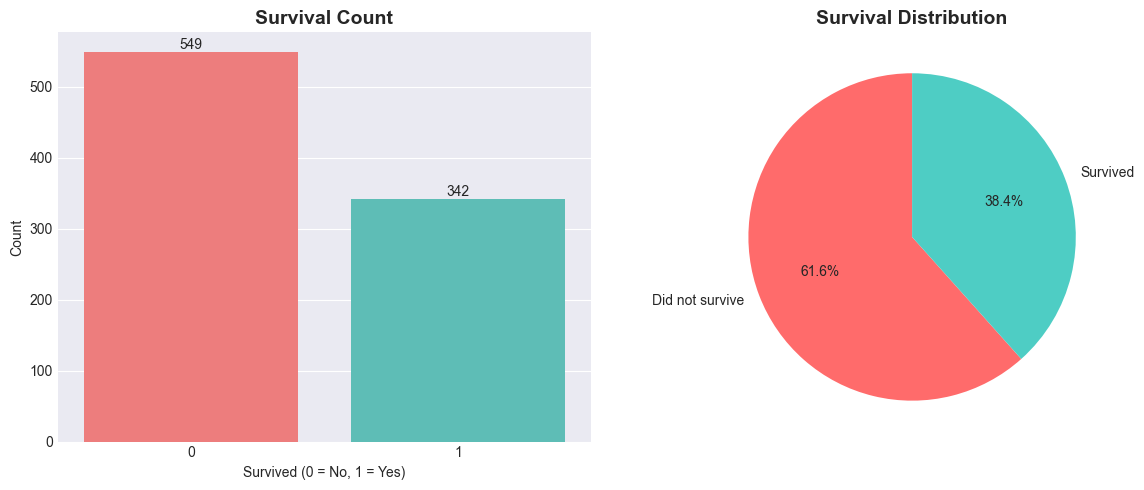

💡 Observation: Dataset is imbalanced (~38% survived, ~62% did not)


In [10]:
# Visualize survival distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Count plot
sns.countplot(data=df, x='Survived', palette=['#FF6B6B', '#4ECDC4'], ax=axes[0])
axes[0].set_title('Survival Count', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Survived (0 = No, 1 = Yes)')
axes[0].set_ylabel('Count')
for container in axes[0].containers:
    axes[0].bar_label(container)

# Pie chart
colors = ['#FF6B6B', '#4ECDC4']
axes[1].pie(survival_counts, labels=['Did not survive', 'Survived'], 
            autopct='%1.1f%%', colors=colors, startangle=90)
axes[1].set_title('Survival Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("💡 Observation: Dataset is imbalanced (~38% survived, ~62% did not)")

## 6. Feature Distributions

Analyzing individual feature patterns

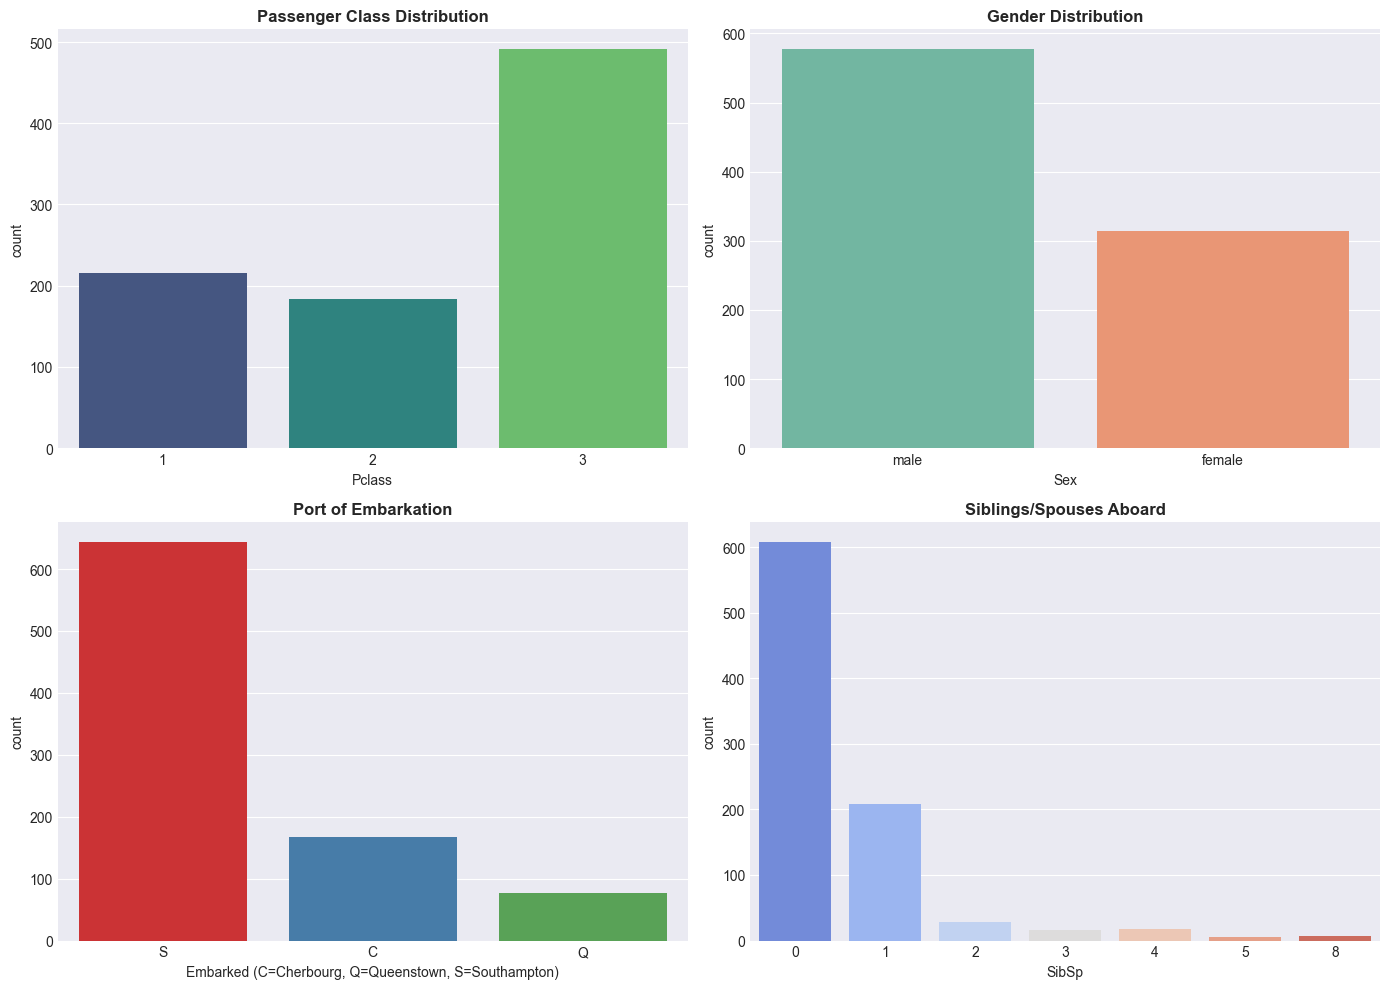

In [11]:
# Categorical features distribution
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Pclass
sns.countplot(data=df, x='Pclass', palette='viridis', ax=axes[0, 0])
axes[0, 0].set_title('Passenger Class Distribution', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Pclass')

# Sex
sns.countplot(data=df, x='Sex', palette='Set2', ax=axes[0, 1])
axes[0, 1].set_title('Gender Distribution', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Sex')

# Embarked
sns.countplot(data=df, x='Embarked', palette='Set1', ax=axes[1, 0])
axes[1, 0].set_title('Port of Embarkation', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Embarked (C=Cherbourg, Q=Queenstown, S=Southampton)')

# SibSp
sns.countplot(data=df, x='SibSp', palette='coolwarm', ax=axes[1, 1])
axes[1, 1].set_title('Siblings/Spouses Aboard', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('SibSp')

plt.tight_layout()
plt.show()

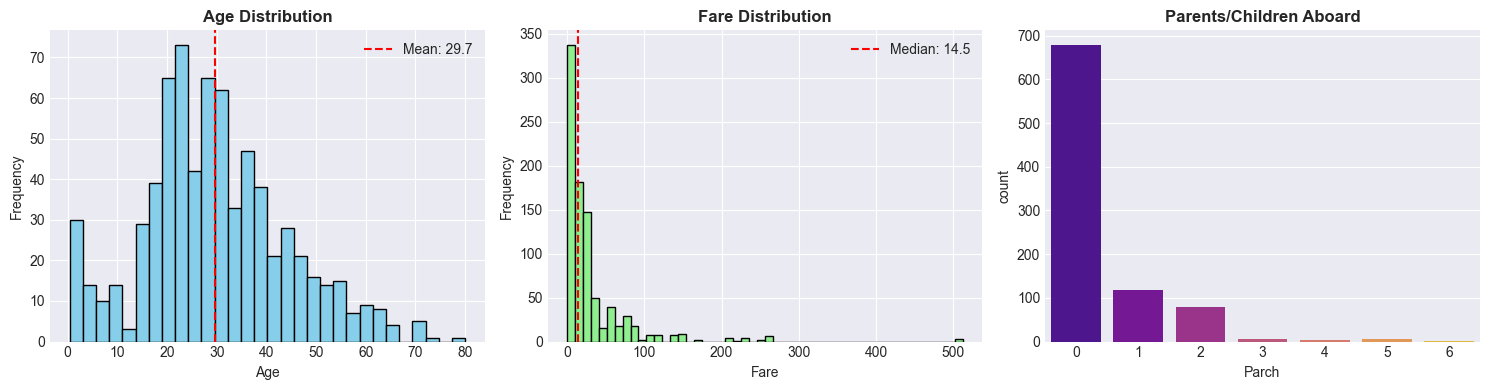

💡 Observations:
- Age: Most passengers between 20-40, mean ~30 years
- Fare: Highly skewed right (some very expensive tickets)
- Most passengers traveled alone (SibSp=0, Parch=0)


In [12]:
# Numerical features distribution
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Age
df['Age'].hist(bins=30, color='skyblue', edgecolor='black', ax=axes[0])
axes[0].set_title('Age Distribution', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')
axes[0].axvline(df['Age'].mean(), color='red', linestyle='--', label=f'Mean: {df["Age"].mean():.1f}')
axes[0].legend()

# Fare
df['Fare'].hist(bins=50, color='lightgreen', edgecolor='black', ax=axes[1])
axes[1].set_title('Fare Distribution', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Fare')
axes[1].set_ylabel('Frequency')
axes[1].axvline(df['Fare'].median(), color='red', linestyle='--', label=f'Median: {df["Fare"].median():.1f}')
axes[1].legend()

# Parch
sns.countplot(data=df, x='Parch', palette='plasma', ax=axes[2])
axes[2].set_title('Parents/Children Aboard', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Parch')

plt.tight_layout()
plt.show()

print("💡 Observations:")
print("- Age: Most passengers between 20-40, mean ~30 years")
print("- Fare: Highly skewed right (some very expensive tickets)")
print("- Most passengers traveled alone (SibSp=0, Parch=0)")

## 7. Survival Analysis by Features

🎯 **Critical Section:** Discovering which features affect survival

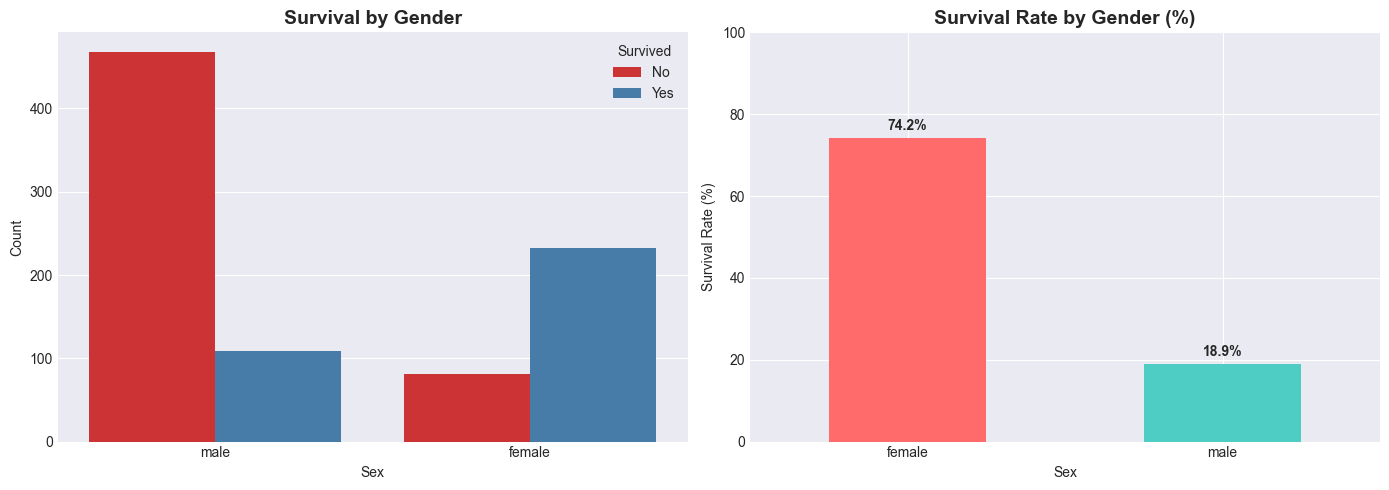

💡 Major Finding: Females had ~74% survival rate vs males ~19%


In [13]:
# Survival by Gender
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(data=df, x='Sex', hue='Survived', palette='Set1', ax=axes[0])
axes[0].set_title('Survival by Gender', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Count')
axes[0].legend(title='Survived', labels=['No', 'Yes'])

# Calculate survival rate by gender
survival_by_sex = df.groupby('Sex')['Survived'].mean() * 100
survival_by_sex.plot(kind='bar', color=['#FF6B6B', '#4ECDC4'], ax=axes[1])
axes[1].set_title('Survival Rate by Gender (%)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Survival Rate (%)')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)
axes[1].set_ylim(0, 100)

for i, v in enumerate(survival_by_sex):
    axes[1].text(i, v + 2, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("💡 Major Finding: Females had ~74% survival rate vs males ~19%")

### 7.2 Survival by Passenger Class

Let's examine survival rates across different passenger classes (1st, 2nd, 3rd).

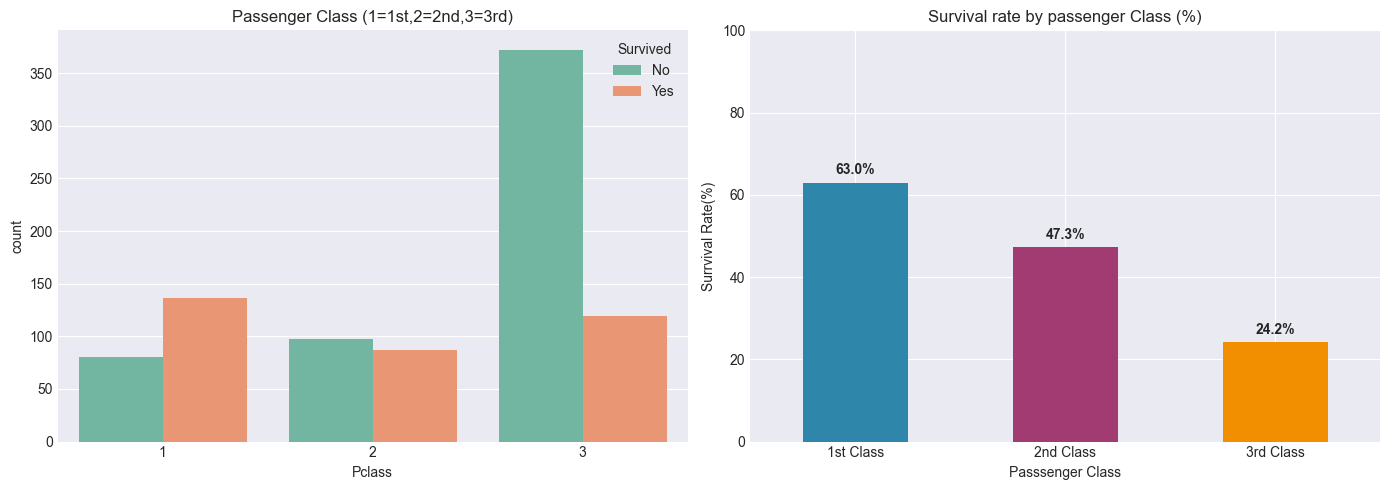

In [14]:
fig,axes=plt.subplots(1,2,figsize=(14,5))
sns.countplot(data=df,x='Pclass',hue='Survived',palette='Set2', ax=axes[0])
axes[0].set_title("Passenger Class (1=1st,2=2nd,3=3rd)")
axes[0].set_label("count")
axes[0].legend(title= 'Survived',labels=['No','Yes'])
survival_by_class=df.groupby('Pclass')['Survived'].mean() * 100
survival_by_class.plot(kind='bar',color=['#2E86AB', '#A23B72', '#F18F01'], ax=axes[1])
axes[1].set_title("Survival rate by passenger Class (%)")
axes[1].set_ylabel("Surrvival Rate(%)")
axes[1].set_xlabel('Passsenger Class')
axes[1].set_xticklabels(['1st Class', '2nd Class', '3rd Class'], rotation=0)
axes[1].set_ylim(0, 100)
for i, v in enumerate(survival_by_class):
    axes[1].text(i, v + 2, f'{v:.1f}%', ha='center', fontweight='bold')
plt.tight_layout()
plt.show()


---
## 8. Correlation Analysis

Examine relationships between numerical features to understand which variables might be related to survival.

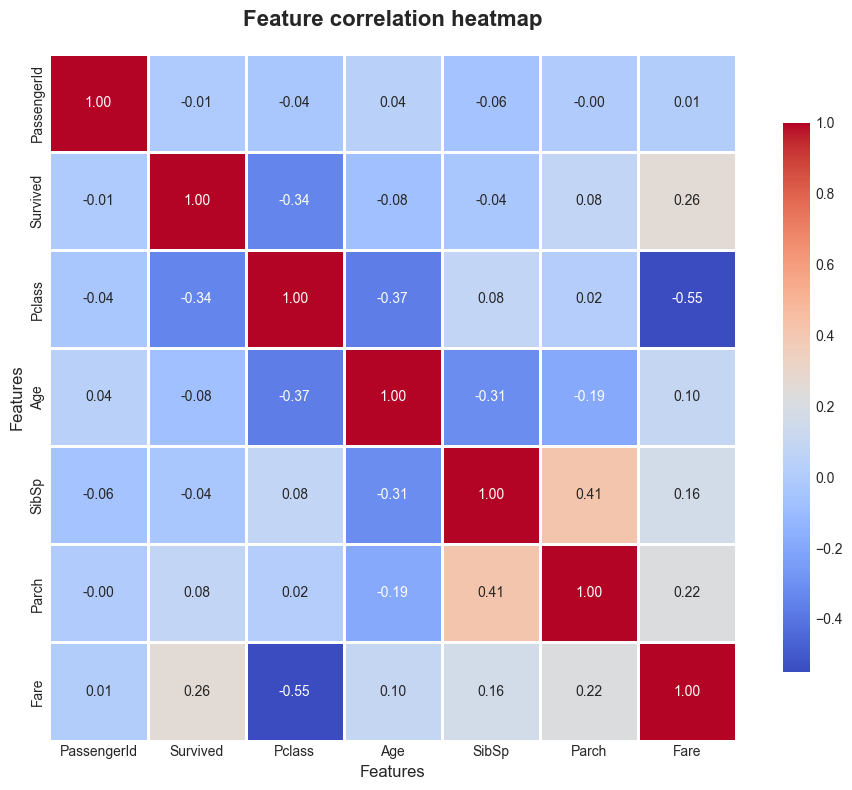

In [16]:
correlation_matrix=df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f',square=True,linewidths=1,cbar_kws={'shrink': 0.8} )
plt.title('Feature correlation heatmap',fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()


---
## 9. Outlier Detection

Identify outliers in numerical features that might affect our model.

Number of Age outliers: 11
Age range considered normal: -6.7 to 64.8 years


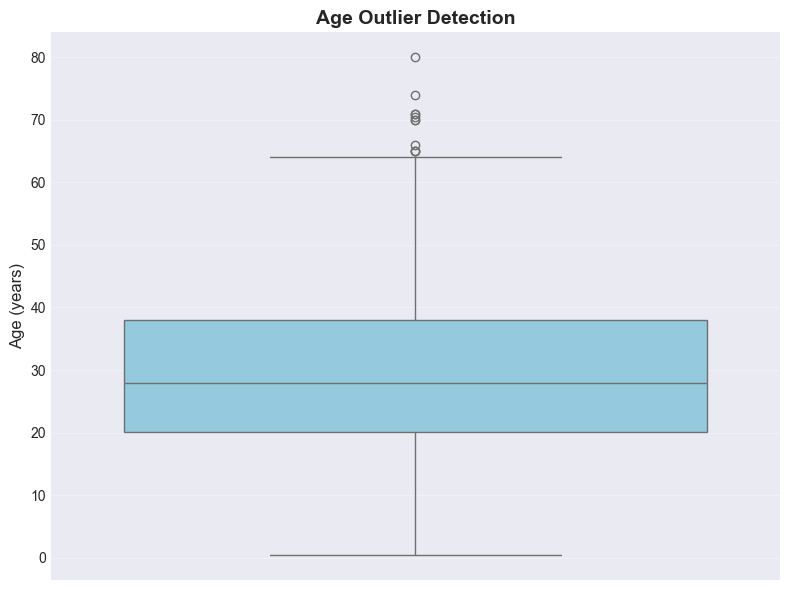

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.boxplot(y=df['Age'], color='skyblue', ax=ax)
ax.set_title('Age Outlier Detection', fontsize=14, fontweight='bold')
ax.set_ylabel('Age (years)', fontsize=12)
ax.grid(axis='y', alpha=0.3)
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]['Age']
print(f"Number of Age outliers: {len(outliers)}")
print(f"Age range considered normal: {lower_bound:.1f} to {upper_bound:.1f} years")
plt.tight_layout()
plt.show()

💡 Fare Outlier Analysis:
   - Number of outliers: 116
   - Normal range: -26.7 to 65.6 USD


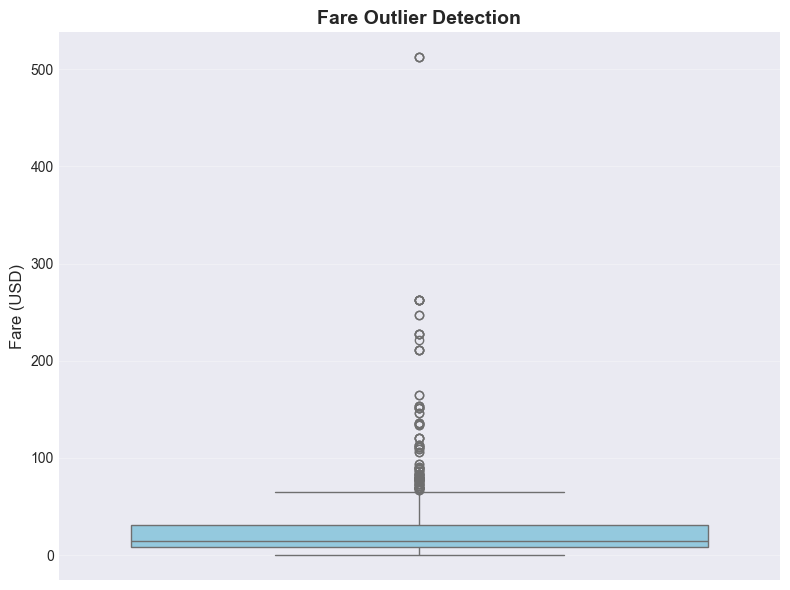

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

sns.boxplot(y=df['Fare'], color='skyblue', ax=ax)
ax.set_title('Fare Outlier Detection', fontsize=14, fontweight='bold')
ax.set_ylabel('Fare (USD)', fontsize=12)
ax.grid(axis='y', alpha=0.3)

Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Fare'] < lower_bound) | (df['Fare'] > upper_bound)]['Fare']
print(f"💡 Fare Outlier Analysis:")
print(f"   - Number of outliers: {len(outliers)}")
print(f"   - Normal range: {lower_bound:.1f} to {upper_bound:.1f} USD")

plt.tight_layout()
plt.show()

---
## 10. Key Insights Summary

**Main Findings from EDA:**

**Missing Data:**
- Cabin: 77% missing → likely need to drop or extract deck info only
- Age: 20% missing → will use median/mean imputation
- Embarked: 2 missing values → fill with mode (most common port)

**Survival Patterns:**
- **Gender**: Females had 74% survival vs males 19% → STRONGEST predictor
- **Passenger Class**: 1st class ~63%, 2nd class ~47%, 3rd class ~24% survival
- Overall survival rate: 38%

**Feature Correlations:**
- Fare positively correlates with Survived (+0.26)
- Pclass negatively correlates with Survived (-0.34)
- Fare and Pclass strongly correlated (-0.55) → expected, since 1st class = expensive

**Outliers Detected:**
- Age: Few/no outliers (all ages are reasonable)
- Fare: Many high outliers → some passengers paid extremely high fares

**Most Important Features for Prediction:**
1. Sex (strongest)
2. Pclass
3. Fare
4. Age (after imputation)

**Next Steps:**
- Phase 2: Data cleaning (impute Age, drop Cabin, fill Embarked)
- Phase 3: Feature engineering (extract titles from names, create family size, fare bins)